Covarianza:
 [[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]

Autovalores:
 [4.22824171 0.24267075 0.0782095  0.02383509]

Autovectores:
 [[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


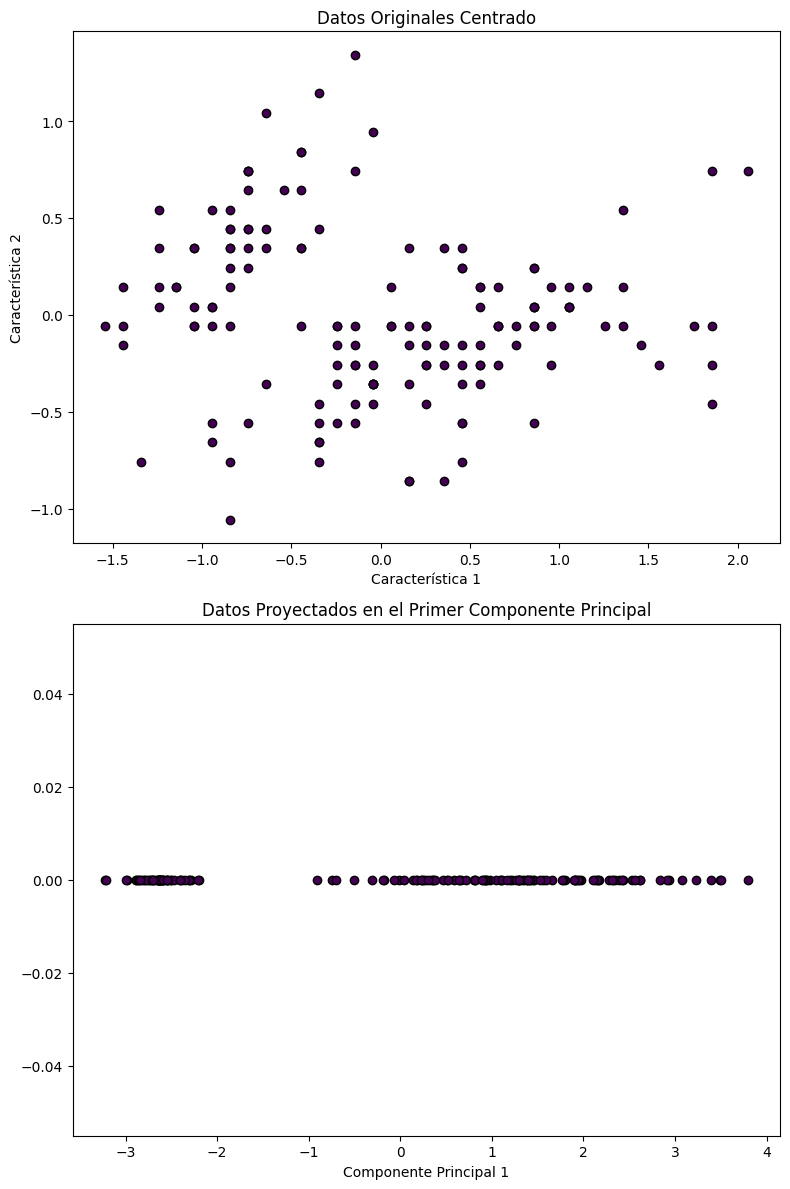

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el dataset Iris
iris = pd.read_csv("C:/Users/Rulig/OneDrive/Escritorio/apps/progra/python/PCD/iris.csv")
columnas = iris.iloc[:, :-1]  # Seleccionar todas las columnas excepto la última (etiquetas)
etiquetas = iris.iloc[:, -1]  # Seleccionar la última columna como etiquetas

# Convertir el dataset a un arreglo de NumPy y centrar los datos (restar la media)
datos = np.array(columnas)
datos_cent = datos - np.mean(datos, axis=0)

# Calcular la matriz de covarianza
cov_matrix = np.cov(datos_cent, rowvar=False)
print("Covarianza:\n", cov_matrix)

# Calcular los autovalores y autovectores de la matriz de covarianza
autovalores, autovectores = np.linalg.eig(cov_matrix)
print("\nAutovalores:\n", autovalores)
print("\nAutovectores:\n", autovectores)

# Seleccionar el primer autovector
v1 = autovectores[:, 0]

# Proyectar los datos originales sobre el primer autovector
dim_red = np.dot(datos_cent, v1)

# Mapear etiquetas a números para la gráfica
etiquetas_unicas = etiquetas.unique()
etiquetas_map = {etiqueta: indice for indice, etiqueta in enumerate(etiquetas_unicas)}
etiquetas_numericas = etiquetas.map(etiquetas_map)

# Crear los gráficos
fig, axes = plt.subplots(2, 1, figsize=(8, 12))

# Gráfico de los datos originales
for i in range(datos.shape[0]):
    axes[0].scatter(datos_cent[i, 0], datos_cent[i, 1], marker='o', c=etiquetas_numericas[i], cmap='viridis', edgecolor='k')

axes[0].set_xlabel('Característica 1', size=10)
axes[0].set_ylabel('Característica 2', size=10)
axes[0].set_title('Datos Originales Centrado')

# Gráfico de los datos proyectados
for i in range(len(dim_red)):
    axes[1].scatter(dim_red[i], 0, marker='o', c=etiquetas_numericas[i], cmap='viridis', edgecolor='k')

axes[1].set_xlabel('Componente Principal 1', size=10)
axes[1].set_title('Datos Proyectados en el Primer Componente Principal')

plt.tight_layout()
plt.show()

Matriz de Covarianza:
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]

Autovalores:
[4.22824171 0.24267075 0.0782095  0.02383509]

Autovectores:
[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


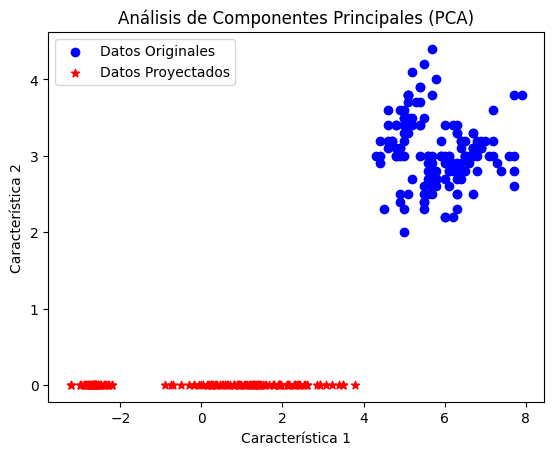

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el dataset Iris
iris = pd.read_csv("C:/Users/Rulig/OneDrive/Escritorio/apps/progra/python/PCD/iris.csv")

# Seleccionar las columnas necesarias
# En este caso, utilizaremos las cuatro características numéricas de Iris
x = iris['sepal_length']
y = iris['sepal_width']
z = iris['petal_length']
w = iris['petal_width']

# Combinar las columnas en una matriz
datos = np.array([x, y, z, w])

# Calcular la matriz de covarianza
cov_matrix = np.cov(datos)
print("Matriz de Covarianza:")
print(cov_matrix)

# Calcular los autovalores y autovectores de la matriz de covarianza
valores, vectores = np.linalg.eig(cov_matrix)
print("\nAutovalores:")
print(valores)
print("\nAutovectores:")
print(vectores)

# Proyectar los datos originales sobre el primer autovector
datos_cent = datos - np.mean(datos, axis=1).reshape(-1, 1)
proyeccion = np.dot(vectores[:, 0], datos_cent)

# Mapear etiquetas a números para la gráfica
etiquetas = iris['species']
etiquetas_unicas = etiquetas.unique()
etiquetas_map = {etiqueta: indice for indice, etiqueta in enumerate(etiquetas_unicas)}
etiquetas_numericas = etiquetas.map(etiquetas_map)

# Scatter plot de los datos originales
plt.scatter(x, y, marker='o', color='blue', label='Datos Originales')

# Scatter plot de los datos proyectados
plt.scatter(proyeccion, np.zeros(len(proyeccion)), marker='*', color='red', label='Datos Proyectados')

# Configuración del gráfico
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.title('Análisis de Componentes Principales (PCA)')
plt.show()
